# Distributions and outliers

The probability distribution $P$ is a function over the random variable $X$, which assigns a probability to each possible value of the variable - a value in the interval $[0,1]$. The variable $X$ can be continuous, discrete, one- or multi- dimensional.

The value of $P(X)$ is for each possible value of the variable $X$ (the entire definition range), and the sum over the definition range must be the same as $1$.

For each probability distribution that we will learn below, we give:
* the definition area (i.e., what is the $X$);
* form (a formula that assigns a probability to each value of $X$),
* parameters (constants that determine the values ​​and / or the shape of the function)

**Guide:** *The choice of the distribution to model depends on the nature of the data.*

In [1]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Gaussian (normal) distribution

The normal (or Gaussian) distribution is a distribution over the whole range of real numbers. It is one of the most common distributions, which is used in practice, since a lot of data is bell-shaped. The function is *symmetric* and is given by two parameters, the mean and the variance.

**Variable type:** one- or multi- dimensional, continuous.

**Definition range:** $(-\infty, +\infty)$

**Format:**
    $$ P(x) = \frac{1}{\sqrt{2\pi \sigma}} e^{\frac{-(x - \mu)^2}{2 \sigma}}$$

**Parameters:**
* $\mu$: mean/average
* $\sigma$: standard deviation

In [2]:
def plot_distribution(data, dist_name="Distribution", bins=20):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data, bins=bins, ax=axes[0], stat="density", kde=True)
    axes[0].set_title(f"{dist_name} - Histogram & KDE")

    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f"{dist_name} - QQ plot (vs Normal)")
    
    plt.show()

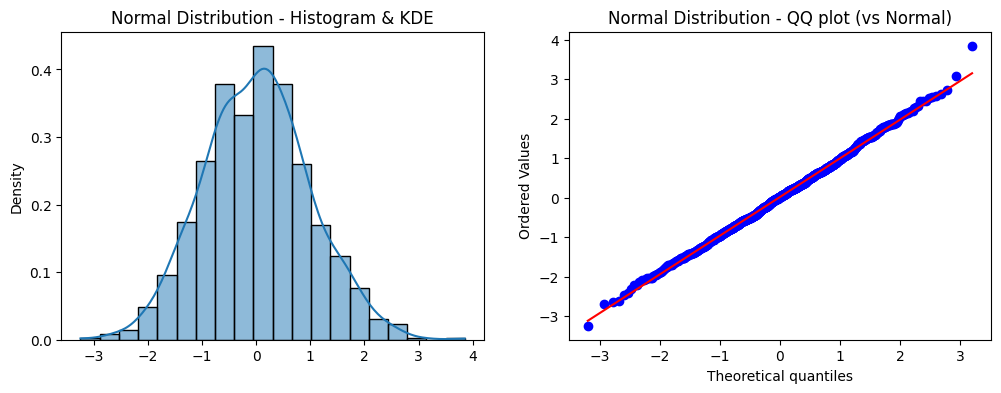

In [3]:
normal = stats.norm
n = 1000
mu = 0
sigma = 1
sample = normal.rvs(loc=mu, scale=sigma, size=n, random_state=42)
plot_distribution(sample, "Normal Distribution")

### Learning the parameters

In practice, we do not know the real values ​​of the parameters. *Parameters are learned from the sample*. The advantage of the process is that we can then conclude on new samples, i.e., each possible value of the variable is determined by the probability.

We have a sample of random variable $X$ of size $n$.
$$ {X_1, X_2, ..., X_n} $$

For a normal distribution, we get the *estimate* for the parameters as follows:

$\mu = E[X_i] = \bar{X}$

$\sigma = \sqrt{ E[(X_i-\bar{X})^2]}$

The $\mu$ value is the average, the $\sigma$ value is the standard deviation of the sample.

We estimate the parameters from the sample:

In [4]:
mu_fit = np.mean(sample)
sigma_fit = np.std(sample)

mu_fit, sigma_fit

(0.01933205582232549, 0.9787262077473543)

Most distributions in the `scipy` library contain a `fit` function, which calculates the most likely values of the distribution parameters relative to the sample.

In [5]:
mu_fit, sigma_fit = normal.fit(sample)
mu_fit, sigma_fit

(0.01933205582232549, 0.9787262077473543)

The estimated values ​​of the parameters are similar to the real values ​​($\mu = 0$, $\sigma^2 = 1$).

In one picture we compare the distribution with the learned parameters with the correct distribution:

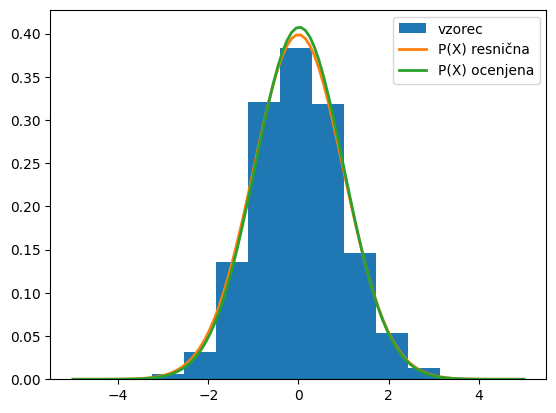

In [6]:
xr = np.linspace(-5, 5, 100)  
P  = [normal.pdf(x) for x in xr]
P_fit = [normal.pdf(x, mu_fit, sigma_fit) for x in xr]

plt.figure()
plt.hist(sample,    label="vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)  
plt.legend();

##### Question 4-1-1

Check how the accuracy of the parameter estimation changes with the size $n$ of the sample.

[Answer](204-1.ipynb#Answer-4-1-1)

## Student's distribution

Student's distribution (or t-distribution) is the distribution over the entire range of real numbers. Its shape is symmetrical and similar to normal distribution. It is less sensitive to *outliers in small samples*.


**Variable type:** one-dimensional, continuous.

**Definition range:** $x \in (-\infty, +\infty)$

**Format:**
    $$ P(x) = \frac{\Gamma[(\nu + 1) / 2]}{\sqrt{\nu \pi} \, \Gamma(\nu / 2)} \left( 1 + \frac{x^2}{\nu} \right)^{-(\nu + 1) / 2},$$

where $\Gamma$ is the gamma function  [gamma function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html).

**Parameters:**
* $\nu$: degrees of freedom

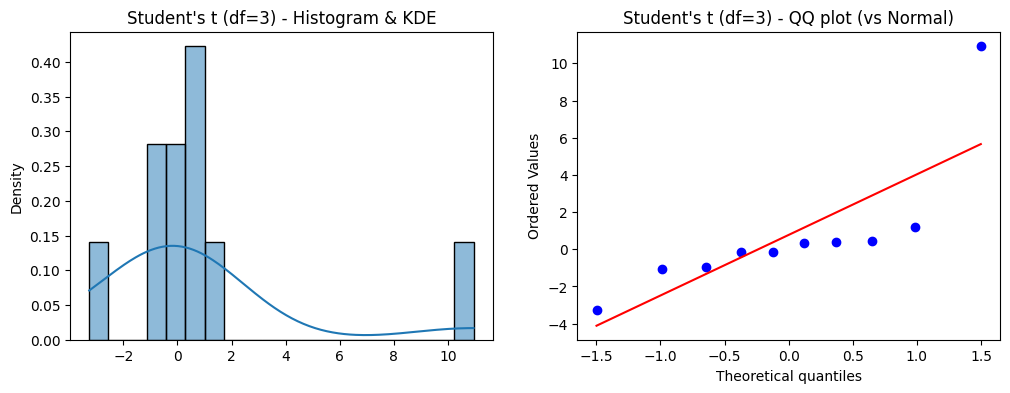

In [7]:
student = stats.t(df=2)
n = 10
data_t = student.rvs(size=n, random_state=42)
plot_distribution(data_t, "Student's t (df=3)")

### Learning the parameters from the sample

In one picture we compare the distribution with the learned parameters with the correct distribution

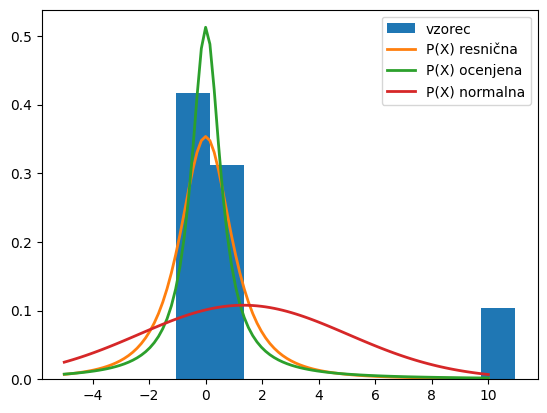

In [8]:
xr = np.linspace(-5, 10, 100)  
n = 8

student = stats.t(df=2)
data_t = student.rvs(size=n, random_state=42)
P  = [student.pdf(x) for x in xr]

student = stats.t
pars = student.fit(data_t)
P_fit = [student.pdf(x, *pars) for x in xr ]

mu_fit, sigma_fit = normal.fit(data_t)
normal_fit = [normal.pdf(x, mu_fit, sigma_fit) for x in xr]

plt.figure()
plt.hist(data_t,    label="vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)
plt.plot(xr, normal_fit, label="P(X) normalna", linewidth=2.0)
plt.legend();

##### Question 4-1-2

Generate a sample with a small number (up to 20) of samples from normal distribution. Compare distribution estimates by means of normal and Student's distribution. Which distribution better evaluates the true distribution?

[Answer](204-1.ipynb#Answer-4-1-2)

##  Beta Distribution

The beta distribution is the distribution of the variable in the *limited interval* $[0, 1]$. Its shape is very flexible, it can have one or two *maximums*. The distribution can be translated to any interval $[a, b]$ with summation (translation) and multiplying (spreading/narrowing) of the interval.

**Variable type:** $x$, one-dimensional, continuous, on a limited interval.

**Definition range:** $x \in [0, 1]$

**Format:**
    $$ \mathrm{P}(x,a,b) = \frac{\mathrm{\Gamma}(a+b)x ^{a-1}(1-x)^{b-1}}{\mathrm{\Gamma}(a)\mathrm{\Gamma}(b)},$$

where $\Gamma$ is the gamma function  [gamma function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html).

**Parameters:**
* a, b: shape parameters

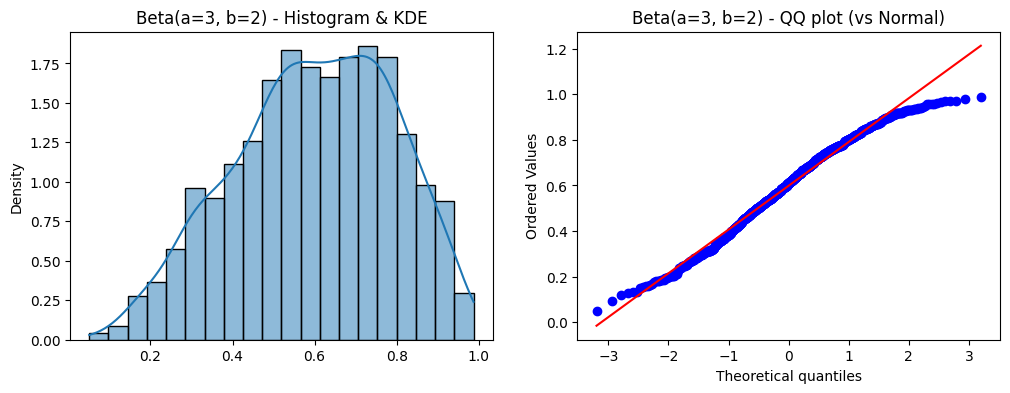

In [9]:
beta = stats.beta(a=3, b=2)
n = 1000
data_beta = beta.rvs(size=n, random_state=42)
plot_distribution(data_beta, "Beta(a=3, b=2)")

##### Question 4-1-3

Change the parameters $a$ and $b$. How does the shape of the function change?

[Answer](204-1.ipynb#Answer-4-1-3)

### Learning the parameters from the sample
We also use the `fit` function to learn the Beta distribution parameters.

In one picture we compare the distribution with the learned parameters with the correct distribution.

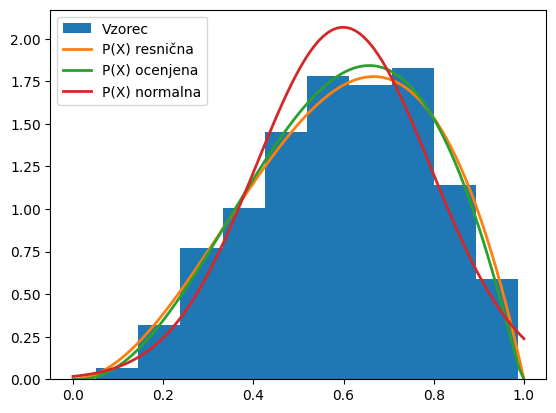

In [10]:
xr = np.linspace(0, 1, 100)  
n = 1000

beta = stats.beta(a=3, b=2)
data_beta = beta.rvs(size=n, random_state=42)
P  = [beta.pdf(x) for x in xr]

beta = stats.beta
pars = beta.fit(data_beta)
P_fit = [beta.pdf(x, *pars) for x in xr]

mu_fit, sigma_fit = normal.fit(data_beta)
normal_fit = [normal.pdf(x, mu_fit, sigma_fit) for x in xr]

plt.figure()
plt.hist(data_beta,    label="Vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0) 
plt.plot(xr, normal_fit, label="P(X) normalna", linewidth=2.0)
plt.legend();

##### Question 4-1-4

Change the parameters $a$ and $b$ and the size $n$ of the sample. How does the quality of the fitting change?

[Answer](204-1.ipynb#Answer-4-1-4)

## Other distributions
### Exponential

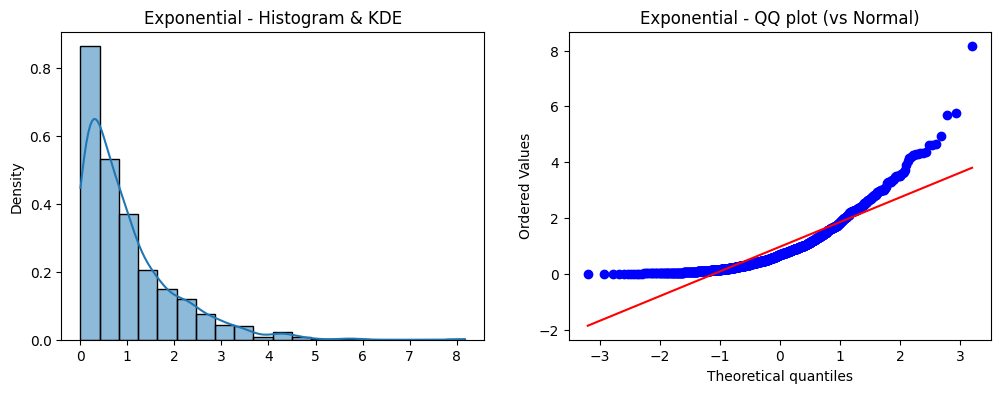

In [11]:
data_exp = stats.expon.rvs(size=1000, random_state=42)
plot_distribution(data_exp, "Exponential")

### Uniform

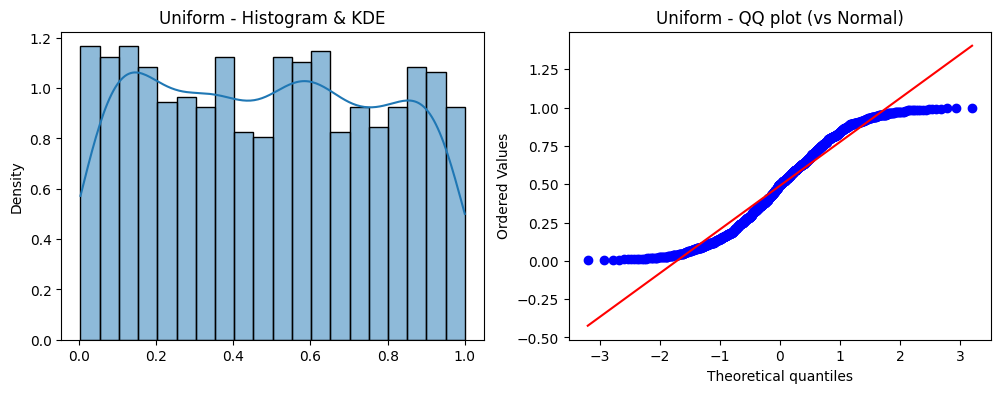

In [12]:
data_uniform = stats.uniform.rvs(size=1000, random_state=42)
plot_distribution(data_uniform, "Uniform")

### Two Gaussians

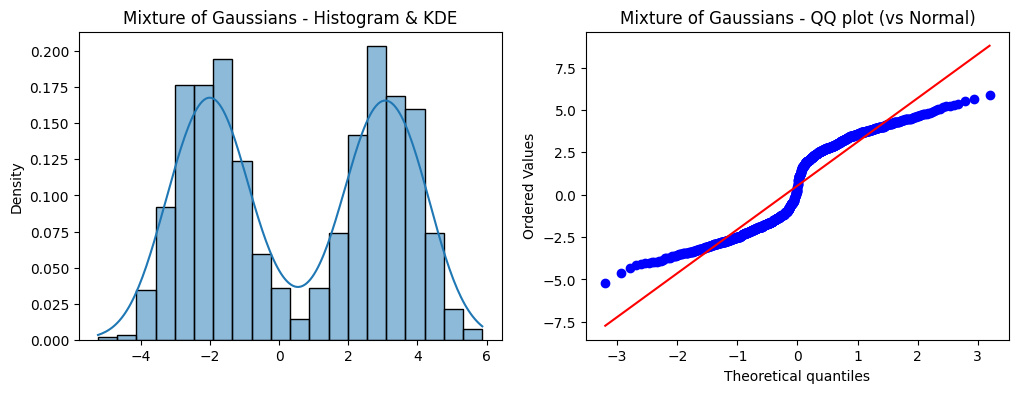

In [13]:
data_mix = np.concatenate([
    stats.norm(loc=-2, scale=1).rvs(500, random_state=42),
    stats.norm(loc=3, scale=1).rvs(500, random_state=99)
])
plot_distribution(data_mix, "Mixture of Gaussians")